In [1]:
from Ex7_Chiloiro_CODE_myclass import *

from scipy.sparse.linalg import eigs
from matplotlib import pyplot as plt

## J = 1 (paramagnetic material)

#### Ground state 
dense = False => we can reach high N by using sparse matrices (~20)

In [2]:
# Parameters
N = 10
N_max = N
lambdas = np.linspace(0., -3., 50)

With odd N, the energy is higher due to the 'frustration'. For even N the density energy is always the same, as expected.

<ipython-input-3-4809917fdc23>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  E[i, j] = eigs(H, k=1, which='SR', return_eigenvectors=False)[0]/n


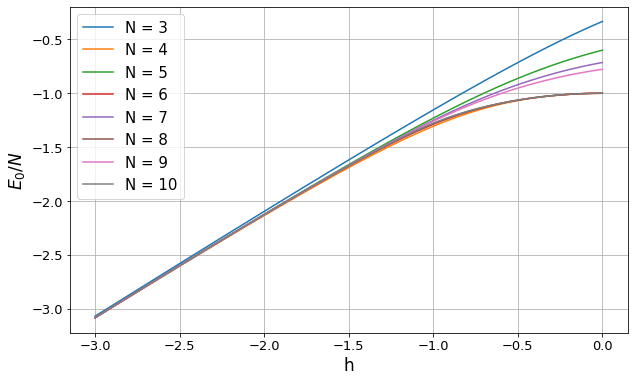

In [3]:
# Diagonalize H for different 𝑁 = 1, ..., 𝑁𝑚𝑎𝑥 and 𝜆 ∈ [0, −3].
N_list = np.arange(3, N_max+1)

# Initialize the array of ground state energies
E = np.zeros((len(N_list), len(lambdas)))

# Diagonalize the Hamiltonian for different N and lambda (ground state)
for i, n in enumerate(N_list):
    for j, l in enumerate(lambdas):
        H = QuantumIsingModel(int(n), l)
        E[i, j] = eigs(H, k=1, which='SR', return_eigenvectors=False)[0]/n

# plot the ground state energy per spin as a function of 𝜆 for different 𝑁
plt.figure(figsize=(10, 6))
for i, n in enumerate(N_list):
    plt.plot(lambdas, E[i, :], label='N = {}'.format(n))
plt.xlabel('h', fontsize=17)
plt.ylabel(r'$E_0/N$', fontsize=17)
plt.legend(fontsize=15)
plt.grid()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Magnetization

In [4]:
# Compute the magnetization per spin versus lambda
lambdas = np.linspace(0.00001, -3., 500)
m = np.zeros_like(lambdas)
for i, l in enumerate(lambdas):
    H_z = QuantumIsingModel(N, l, dense=True, local_int=True)/l # sigma_z
    H = QuantumIsingModel(N, l)
    eigval, eigvec = eigs(H, k=1, which='SR', return_eigenvectors=True)
    m[i] = np.real((eigvec.conj().T @ H_z @ eigvec/N)[0, 0])

# Compute its second derivative with respect to lambda
first_derivative = np.gradient(m, lambdas)  # np.gradient error ~ O(h^2)
second_derivative = np.gradient(first_derivative, lambdas)
# Find the critical point (zero of the second derivative)
sign = np.sign(second_derivative)
sign[sign == 0] = 1
idx = np.where(np.abs(np.diff(sign)) == 2)[0]

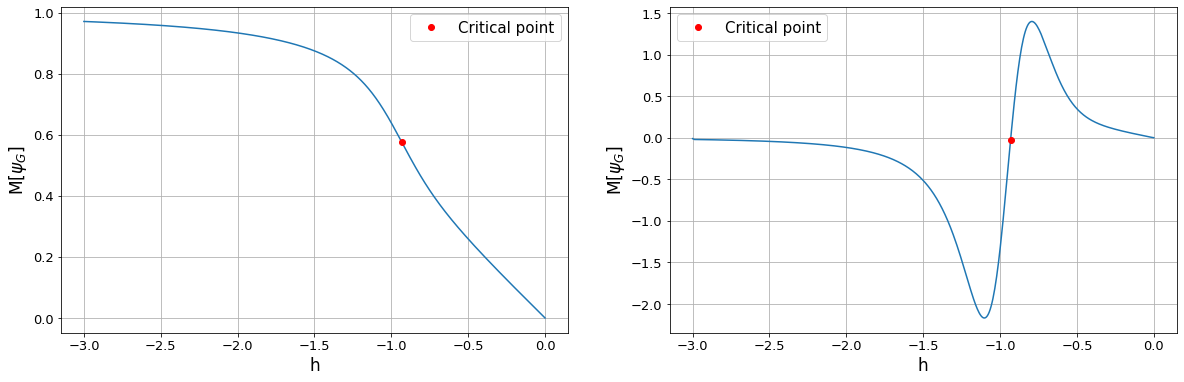

In [14]:
# plot the magnetization per spin and its second derivative versus lambda, and the critical point
# graph beside each other

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(lambdas, m)
plt.plot(lambdas[idx+1], m[idx+1], 'ro', label='Critical point')
plt.xlabel('h', fontsize=17)
plt.ylabel('M[$\psi_{G}$]', fontsize=17)
plt.legend(fontsize=15)
plt.grid()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.subplot(122)
plt.plot(lambdas, second_derivative)
plt.plot(lambdas[idx+1], second_derivative[idx+1], 'ro', label='Critical point')
plt.xlabel('h', fontsize=17)
plt.ylabel('M[$\psi_{G}$]', fontsize=17)
plt.legend(fontsize=15)
plt.grid()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

#### Excited states
dense = True => we can reach at most N=13 by using dense matrices (2^28 elements, each of one of 8 bytes = 2 GB)

In [6]:
# Parameters
lambda_list = np.array([0, -2], dtype=float)
colors = ['#1f77b4', '#ff7f0e']

memory_usage(14)

Memory usage for H ~ 2.1 GB


h removes state degeneratios

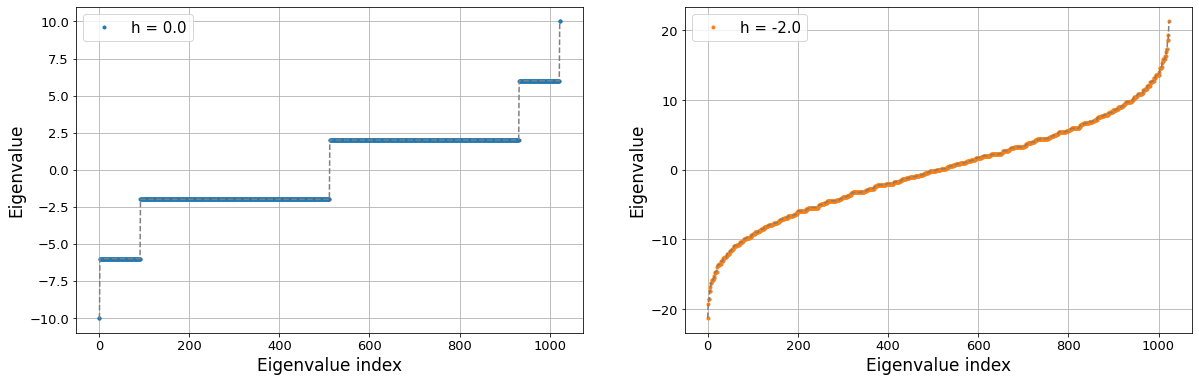

In [16]:
# Given N and lambda, compute all the eigenvalues of H, for different lambda values
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
for i, l in enumerate(lambda_list):
    H = QuantumIsingModel(N, l, dense=True)
    eigvals = np.linalg.eigvalsh(H)
    ax[i].plot(eigvals, '.', label='h = {}'.format(l), color=colors[i])
    ax[i].plot(eigvals, '--', color='gray')
    ax[i].set_xlabel('Eigenvalue index', fontsize = 17)
    ax[i].set_ylabel('Eigenvalue', fontsize = 17)
    ax[i].legend(fontsize=15)
    ax[i].grid()
    ax[i].tick_params(labelsize=13)

Gaps

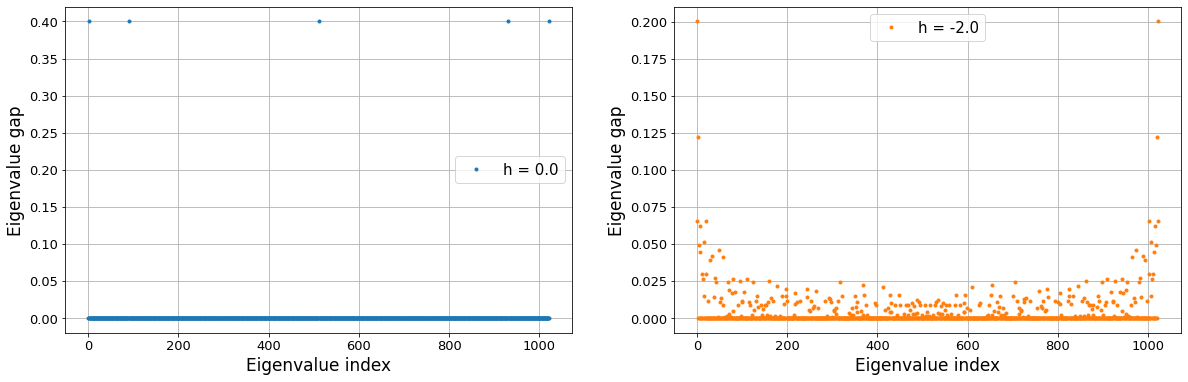

In [18]:
# Compute the energy gap, for N = 10 and lambda = 0, N = 10 and lambda = −2
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
for i, l in enumerate(lambda_list):
    H = QuantumIsingModel(N, l, dense=True)
    eigvals = np.linalg.eigvalsh(H)
    ax[i].plot((eigvals[1:]-eigvals[:-1])/n, '.', label='h = {}'.format(l), color=colors[i])
    ax[i].set_xlabel('Eigenvalue index', fontsize = 17)
    ax[i].set_ylabel('Eigenvalue gap', fontsize = 17)
    ax[i].legend(fontsize=15)
    ax[i].grid()
    ax[i].tick_params(labelsize=13)